# Objetivo

Este trabalho visa obter insights através dos dados de como está o mercado de Data Science e o que ele esta requerendo. A ideia a priri era obter insights a cerca de salários e skills demandadas, até a coleta dos dados não se tinha com clareza  que tipo de análise exatamente seria feita. Com esse intuito preilimar coletou-se os dados das mais diversas fontes, tais como kaagle, glassdoor, h1bdata e medley. Os links de onde foram baixados os dataset podem ser encontrados abaixo e categorizados segundo uma inspeção preliminar:


<br/>


- Salaries Around World: O conjunto de dados nessa categoria envolve datasets com mesmo esquema. Eles possuem dados sobre o ano de coleta do dado, o tipo a modalidade empregatícia, salários na moeda local, salarios em dolar, proporção de tempo em regime remoto, onde fica sede da compania ,o tamanho da compania e finalmente o local de residência do empregado.

    - *AI/ML Salaries* : https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries 
    - *Data Science Jobs Analysis*: https://www.kaggle.com/datasets/niyalthakkar/data-science-jobs-analysis
    - *Data Jobs 2023*: https://www.kaggle.com/datasets/dinarkhan/data-jobs-2023 
    
    <br/>

 - Jobs Descriptions: Esse conjunto de dados foi coletado visando analisar quais são as skills que mais aparecem nas descrições de vagas de trabalho. Os dataset possuem squemas diferentes, mas ambos foram coletados com o intuito de  somente utilizar a coluna equivalente ao cargo de trabalho e a descrição:

    - *Data Scientist Jobs* - GlassDoor: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs?datasetId=778775&sortBy=voteCount : Possui o cargo de trabalho ofertado na vaga, aonde a vaga foi postada, a compania que postou a vaga e a descrição do job. 
    
    <br/>

    - *2023 Data Scientists Job Descriptions* : https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions :  Esse dataset é bem mais amplo, além de possuir o título do job e sua descrição ele possui o nnome da compahia, seu lucro, sua avalição na plataforma glassdoor e o setor de atuação daquela compahia.  De fato poderia-se fazer fazer uma análise mais rica com esse dataset, mas por questões de escopo de projeto apenas utilizou-se as columnas relativas ao título do job, a descrição e o setor em que a companhia atua com a finalidade de obter um insight de qual setores estão mais empregando. 
    
    <br/>



- Jobs mapping Skills: Nessa categoria temos o mapeamento de habilidades por job, são listados ao todo  16 habilidades onde um empregado. Cada linha desse dataset equivale a um empregado num determinado posto, que respondeu sua posição em relação a aquela habilidade.

    - *IT Career Proficiency Dataset*: https://data.mendeley.com/datasets/kzt6h7pz97 
    
    <br/>
    

- H1Bdata: Esses dataset foi obtido a partir de uma adpatação de um script de  web scrapping em  "https://github.com/yiuhyuk/ds_salary_h1b/blob/master/h1b_salary.ipynb". O código adpatado pode ser encontrando na classe       ```H1bdataWebScrapper.py``` e sua implementação no script  ```h1bdata_web_scrapping.py``` ambos presensente nesse repositório. Nesse datasset temos  o nome da compania em que está o job, o título do job, o salário em dolar, a data de postagem, a cidade e o estado americano correspondente.


Por fim valem duas observações. 

-> A primeira em relação  aos dataset, os datasets das categorias `Jobs Descriptions`,  `Jobs mapping Skills` e `H1Bdata` correpondem a dados coletados relativo ao território dos EUA, portanto a vasta maioria dos dados aqui coletados diz respeito ao Estados Unidos, pois a vasta maioria dos dados disponíveis gratuitos correspondem ao território dos EUA. Por isso daremos ênfase a ánalise em território americano.

-> A segunda é em relação a implementação do pré-processamento. Durante a pós-graduação de ciência de dados e analytics aprendemos diversos conceitos de engenharia de software e Pogração orientada a objetos. Com o intuito de implementar os conceitos aprendidos nessas disciplinas na prática, implementou-se o pré-processamento segmentado em classes, então utilizaremos  o package  `PreProcessing` para performar as principais tarefas de pre-processamento.

Dadas as devidas descrições, mãos a obra !



# Extração de insights do mercado de trabalho e o que ele está requerendo nos últimos anos

In [20]:

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from ComposeData.CsvReader import CsvReader
from Env.Constants import *

warnings.filterwarnings('ignore')



## Merging Dos dados 

Como fora mencionado na descrição os dados relativos a categoria "`Salaries Around world`" possuem o mesmo esquema, exatamente por isso é foi realizado um trabalho de concatenar esse datasets num único dataset claro tendo o cuido de eliminar os duplicados para retirar redudância no dataset resultante da composição. Para isso construi-se a classe `Concatenator` cuja implementação  de concatenação de dados  pode ser vista a seguir: 

In [21]:
#Even it works I doesn't looks weel, I would like to replace that for something more elegant.


from ComposeData.Concatenator import Concatenator
from Env.ProjectPaths import DATASET_PATH


#Instantiate Classes

#Readers

csv_reader1 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science jobs_salaries_world.csv")
csv_reader2 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science_salaries_around_world.csv")
csv_reader3 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/ds.salaries.csv")
csv_reader4 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/salaries.csv")

#Concatenator

Concatenator = Concatenator()


#Load data

df_salaries_around_world1 = csv_reader1.load_data()
df_salaries_around_world2 = csv_reader2.load_data()
df_salaries_around_world3 = csv_reader3.load_data()
df_salaries_around_world4 = csv_reader4.load_data()


#Cocatenate

dfs_salaries_around_world = [df_salaries_around_world1, df_salaries_around_world2, df_salaries_around_world3, df_salaries_around_world4]
salaries_around_world = Concatenator.process_data(data=dfs_salaries_around_world)

#Save on to analyse Output

salaries_around_world.to_csv(DATASET_PATH + "Salaries_around_world/Composed_data/salaries_around_world.csv")

## Avaliação preliminar dos dados

In [22]:
# LoadData
from Env.ProjectPaths import *

salaries_around_world_df = CsvReader(file_path = SALARIES_WORLD_COMPSED_DATASET_PATH).load_data()
h1bdata_df = CsvReader(file_path = H1BDATA_DATASET_PATH).load_data()
job_description_df = CsvReader(file_path = KAGGLE_JOB_DESCRIPTIONS_DATASE_PATHT).load_data()
skills_mapping_df = CsvReader( file_path= SKILLS_MAPPING_DATASET_PATH).load_data()



### Salaries Around World

In [23]:
salaries_around_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2370 non-null   int64 
 1   experience_level    2370 non-null   object
 2   employment_type     2370 non-null   object
 3   job_title           2370 non-null   object
 4   salary              2370 non-null   int64 
 5   salary_currency     2370 non-null   object
 6   salary_in_usd       2370 non-null   int64 
 7   employee_residence  2370 non-null   object
 8   remote_ratio        2370 non-null   int64 
 9   company_location    2370 non-null   object
 10  company_size        2370 non-null   object
dtypes: int64(4), object(7)
memory usage: 222.2+ KB


In [38]:
salaries_around_world['employee_residence'].value_counts()

US    1558
GB     187
IN      89
CA      79
DE      61
      ... 
MD       1
MK       1
BA       1
AM       1
KW       1
Name: employee_residence, Length: 76, dtype: int64

Primeira coisas que percebemos. O dataset não é representativo para todos os países, mesmo concatenando todos os datasets disponíveis. A imensa maioria dos registro correspondem as empregos nos EUA, o dataset se mostra representativo para os 5 primeiros países com mais registros. Então só consideraremos os 5 países com mais registros nesse dataset.

Além disso...

In [39]:
salaries_around_world_df['employment_type'].value_counts()

FT    2331
PT      21
CT       9
FL       9
Name: employment_type, dtype: int64

A imensa maioria do dataset corresponde a  vínculo empregatício FULL time. Logo os outros tipos de vínculos também não são representativos e devem ser eliminados.

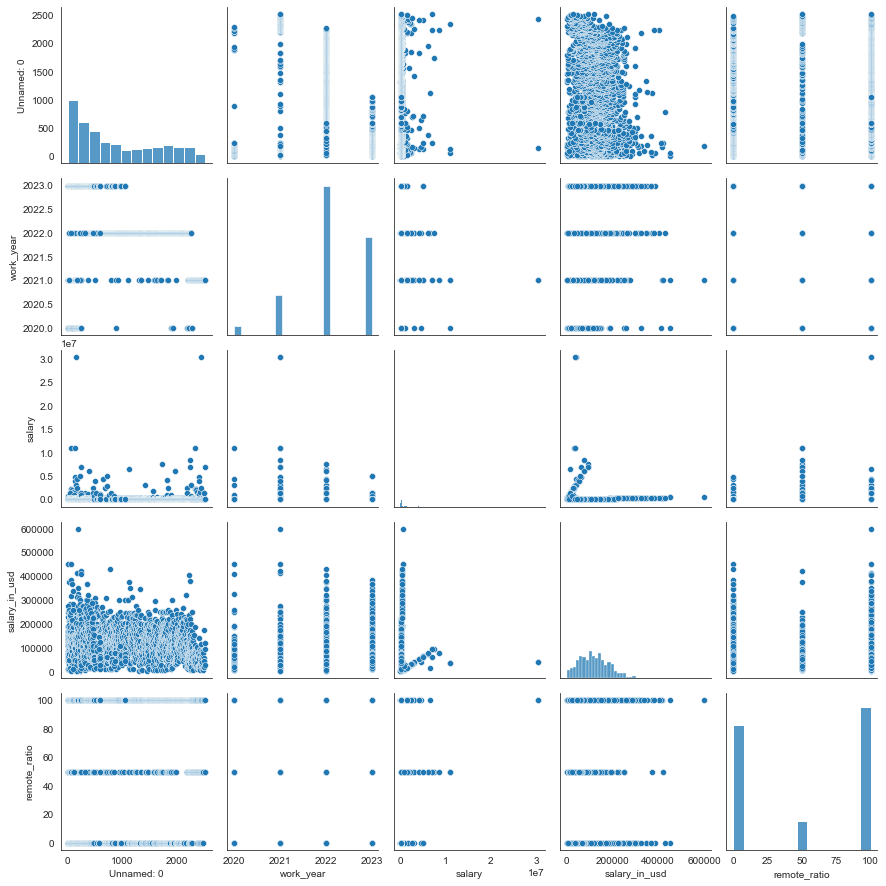

In [25]:
sns.set_style("white")
sns.pairplot(salaries_around_world_df, diag_kind= 'auto' )

Nesse dataset só tem uma variável numérica que nos interessa, que é "salary_in_usd", vamos analisa-la mais a fundo.

<AxesSubplot:ylabel='Density'>

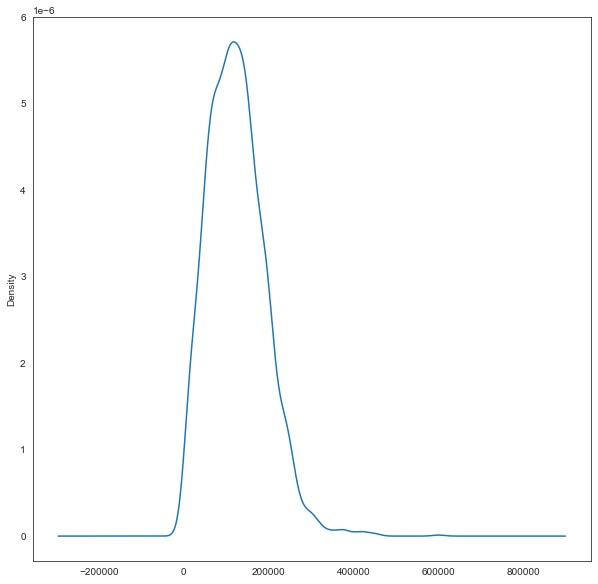

In [26]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='density')


Visualmente  a  variáveil relativa ao salário parece ter distribuição normal. Contudo  esssa distribuição não está refletindo a linha de análise, pois para nossa linha de análise é interessante considerar a distribuição pelo título do job.

<AxesSubplot:>

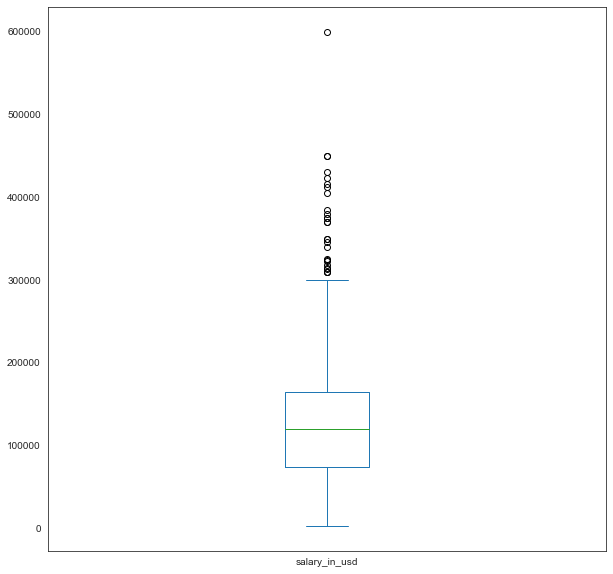

In [27]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='box')

De forma absoluta parece haver alguns outliers, trateremos disso mais adiante.

Contudo havemos de observar um pequeno detalhes:

In [28]:
salaries_around_world_df['salary_in_usd']

0        64369
1        68428
2        85000
3       230000
4       125000
         ...  
2365     37665
2366     75455
2367     63285
2368     58417
2369     46246
Name: salary_in_usd, Length: 2370, dtype: int64

A coluna salarios está em int64, é interessante que essa coluna seja um float por representar um valor monetário.

Analise  dos títulos de jobs

In [29]:
salaries_around_world_df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

Como podemos ver temos muitos títulos para trabalhos, muitos deles podem ser simplificados, então temos uma primeira tarefas simplificar os postos de trabalho nesse dataset.
Mas essa não é a única subsituição a fazer, note que outra colunas também devem passar por esse tipo de transformação afim de fazer com a informação contida nela fique mais clara:



In [30]:
salaries_around_world_df[['experience_level','employee_residence','company_location', 'company_size']].head(10)

,experience_level,employee_residence,company_location,company_size
0,EN,DE,DE,L
1,SE,GR,US,L
2,EX,RU,RU,M
3,EX,RU,RU,L
4,EN,US,US,S
5,SE,US,US,M
6,MI,US,US,M
7,MI,FR,FR,L
8,MI,AT,AT,L
9,SE,CA,CA,L


Sendo assim outro pre-processamento a se fazer é realizar substituições nessas colunas com a finalidade de torna-la mais claras e explícitas.

Tendo preliminarmente  analisado esse dataset temos então listados todo o pré-processamento que será feito a priori. Assim sendo vamos realizar-lo

In [31]:
import subprocess

subprocess.run(['python', 'setup.py'], capture_output=True, text=True)


CompletedProcess(args=['python', 'setup.py'], returncode=1, stdout='', stderr='usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]\n   or: setup.py --help [cmd1 cmd2 ...]\n   or: setup.py --help-commands\n   or: setup.py cmd --help\n\nerror: no commands supplied\n')

In [32]:
from Preprocessing.TransformData.DataReplacer import  DataReplacer
from Preprocessing.CleanData.DataFilter import DataFilter
from Preprocessing.TransformData.DataTypeConversor import DataTypeConversor
from Preprocessing.PreProcessing import PreProcessing


In [55]:
#Salaries around world preprocessing

#Replacing if contains






jobs = ["ANALYST", "DATA ENGINEER", "DATA SCIENTIST", "MACHINE LEARNING ENGINEER", "ARCHITECT", "DATA SCIENCE", "DATA ANALYTICS"]
salaries_world_replacing_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col='job_title', values=jobs)


# map replace

map = {
    "ANALYST": "DATA ANALYST",
    "DATA ANALYTICS": "DATA ANALYST",
    "DATA SCIENCE": "DATA SCIENTIST",
    "ANALYTICS ENGINEER": "DATA ANALYST",
    "ETL DEVELOPER": "DATA ENGINEER",
    "ARCHITECT" : "DATA ARCHITECT",
    "COMPUTER VISION ENGINEER":"MACHINE LEARNING ENGINEER",
    "DEEP LEARNING ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING INFRASTRUCTURE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING SOFTWARE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING DEVELOPER": "MACHINE LEARNING ENGINEER",
    "COMPUTER VISION SOFTWARE ENGINEER": "MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING MANAGER": "MACHINE LEARNING ENGINEER",
    "HEAD OF MACHINE LEARNING" : "MACHINE LEARNING ENGINEER",
    "ML ENGINEER":"MACHINE LEARNING ENGINEER",
    "MLOPS ENGINEER":"MACHINE LEARNING ENGINEER",
    "NLP ENGINEER":"MACHINE LEARNING ENGINEER",
    "AI DEVELOPER": "MACHINE LEARNING ENGINEER",
    "AI SCIENTIST":"RESEACHER",
    "APPLIED SCIENTIST":"RESEACHER",
    "APPLIED MACHINE LEARNING SCIENTIST":"RESEACHER",
    "3D COMPUTER VISION RESEARCHER":"RESEACHER",
    "DEEP LEARNING RESEARCHER":"RESEACHER",
    "MACHINE LEARNING RESEARCH ENGINEER":"RESEACHER",
    "MACHINE LEARNING RESEARCHER":"RESEACHER",
    "RESEARCH ENGINEER":"RESEACHER",
    "RESEARCH SCIENTIST":"RESEACHER",
    "MACHINE LEARNING SCIENTIST": "RESEACHER",
    "HEAD OF DATA": "CHIEF DATA OFFICER",
    "CLOUD DATABASE ENGINEER":"DATABASE ENGINEER"
    
}


salaries_world_map_replacing_jobs = DataReplacer(task="MAPREPLACING", on_col='job_title', map=map)

#filter non-full time

salaries_world_filter_no_fulltime = DataFilter(filter_by="FILTER_NOT_EQUAL_VALUE",  col="employment_type", by_value="FT")

# map replace contry abrevitations

map = CsvReader(file_path=DATASET_PATH + "Salaries_around_world/maps/countries_map.csv").load_data()
map = dict(map.values)
salaries_world_map_replace_contries_abv_er = DataReplacer(task="MAPREPLACING", on_col='employee_residence', map=map)
salaries_world_map_replace_contries_abv_cl = DataReplacer(task="MAPREPLACING", on_col='company_location', map=map)


#map replace expirience level
map={
    "EN": "ENTRY-LEVEL",
    "EX": "EXPIRIENCED",
    "MI": "MID-LEVEL",
    "SE": "SENIOR-LEVEL"
}
salaries_world_map_replace_experience_level =  DataReplacer(task = "MAPREPLACING", on_col='experience_level', map=map)


#map replace company_size
map={
    "L": "LARGE-SIZE",
    "M": "MEDIUM-SIZE",
    "S": "SMALL-SIZE",
}
salaries_world_map_replace_company_size =  DataReplacer(task = "MAPREPLACING", on_col='company_size', map=map)
# filter job_titles less freq than 4

salaries_world_filter_less_freq = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='job_title', by_value= 4)


#convert salaries to float

salaries_world_convert_salaries_usd_float = DataTypeConversor(to_type="TO_FLOAT", col="salary_in_usd")



#Salaries Around world prepropcessing
print("**************************************************************")
print("Iniciating Pre-Processing on salaries__around_worl\n")

salaries_world_preprocessors = [ 
                                salaries_world_replacing_if_contains, salaries_world_map_replacing_jobs, salaries_world_map_replace_experience_level, salaries_world_filter_no_fulltime, \
                                salaries_world_map_replace_contries_abv_er, salaries_world_map_replace_contries_abv_cl, \
                                salaries_world_map_replace_company_size, salaries_world_filter_less_freq,
                                salaries_world_convert_salaries_usd_float
                                
                            ]
salaries_world_preprocessing =  PreProcessing( pre_processors= salaries_world_preprocessors)
salaries_world_around_df_preprocessed = salaries_world_preprocessing.process_data(salaries_around_world)
print("salaries__around_worl Preprocessing Completed Sucessfully. ")
print("************************************************************** \n")

**************************************************************
Iniciating Pre-Processing on salaries__around_worl

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Perform Data conversion... 
Data conversion DONE !

salaries__around_worl Preprocessing Completed Sucessfully. 
************************************************************** 



Vamos então checar o novo arquivo:

In [56]:
salaries_world_around_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2325 non-null   int64  
 1   experience_level    2325 non-null   object 
 2   employment_type     2325 non-null   object 
 3   job_title           2325 non-null   object 
 4   salary              2325 non-null   int64  
 5   salary_currency     2325 non-null   object 
 6   salary_in_usd       2325 non-null   float64
 7   employee_residence  2325 non-null   object 
 8   remote_ratio        2325 non-null   int64  
 9   company_location    2325 non-null   object 
 10  company_size        2325 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 218.0+ KB


Se os países são os top 5 mais frequentes:

In [58]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA                                1549
UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND     187
INDIA                                                     84
CANADA                                                    78
GERMANY                                                   58
                                                        ... 
BULGARIA                                                   1
CHINA                                                      1
IRAN                                                       1
NEW ZEALAND                                                1
KUWAIT                                                     1
Name: employee_residence, Length: 73, dtype: int64

Queremos somente os 5 mais frequentes:

In [64]:
#filter top 5 most frequent countries
country_freq_threshold= salaries_world_around_df_preprocessed['employee_residence'].value_counts()[4]

salaries_world_filter_top_5_most_freq =  DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value=country_freq_threshold, col='employee_residence')
salaries_world_around_df_preprocessed = salaries_world_filter_top_5_most_freq.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [65]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA                                1549
UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND     187
INDIA                                                     84
CANADA                                                    78
GERMANY                                                   58
Name: employee_residence, dtype: int64

como mencionado anteriomente é mais interessante olhar para os dados de salários por categorias, como fizemos a simplificação dos títulos dos jobs então conseguimos analisar a faixa de salários por categoria

In [61]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST                  543
DATA ENGINEER                   498
DATA ANALYST                    442
MACHINE LEARNING ENGINEER       236
RESEACHER                       129
DATA ARCHITECT                   55
DATA MANAGER                     16
BI DEVELOPER                     11
DATA SPECIALIST                   9
DATA OPERATIONS ENGINEER          6
DATABASE ENGINEER                 4
DATA INFRASTRUCTURE ENGINEER      4
CHIEF DATA OFFICER                3
Name: job_title, dtype: int64

Apesar da simplificação realizada, percebemos temos quantidade não significativa para determinados títulos de jobs, nesse caso vamos pegar  o top 6 mais frequente

In [67]:
freq_job_title_treshold = salaries_world_around_df_preprocessed['job_title'].value_counts()[5]

filter_less_freq_job_titles = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value= freq_job_title_treshold , col='job_title')
salaries_world_around_df_preprocessed = filter_less_freq_job_titles.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [68]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST               543
DATA ENGINEER                498
DATA ANALYST                 442
MACHINE LEARNING ENGINEER    236
RESEACHER                    129
DATA ARCHITECT                55
Name: job_title, dtype: int64

ok, agora podemos olhar para os salarios por categoria

Text(0, 0.5, 'Salary in USD')

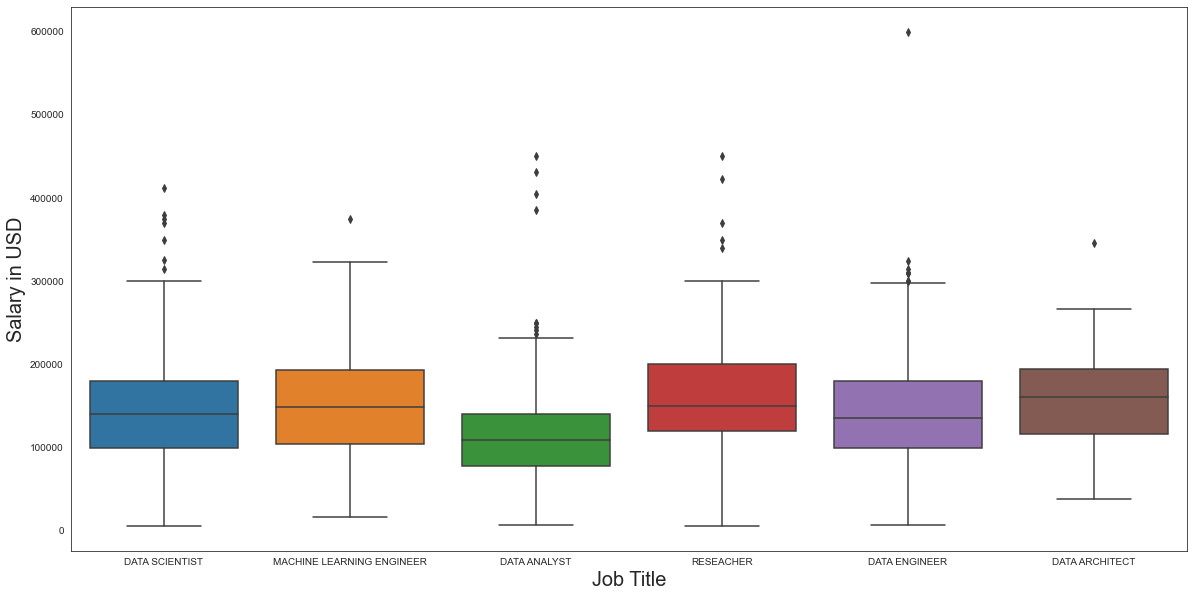

In [73]:

fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data=salaries_world_around_df_preprocessed)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)

vamos olhar mais detalhamdamente a distribuição de salarios por categorias

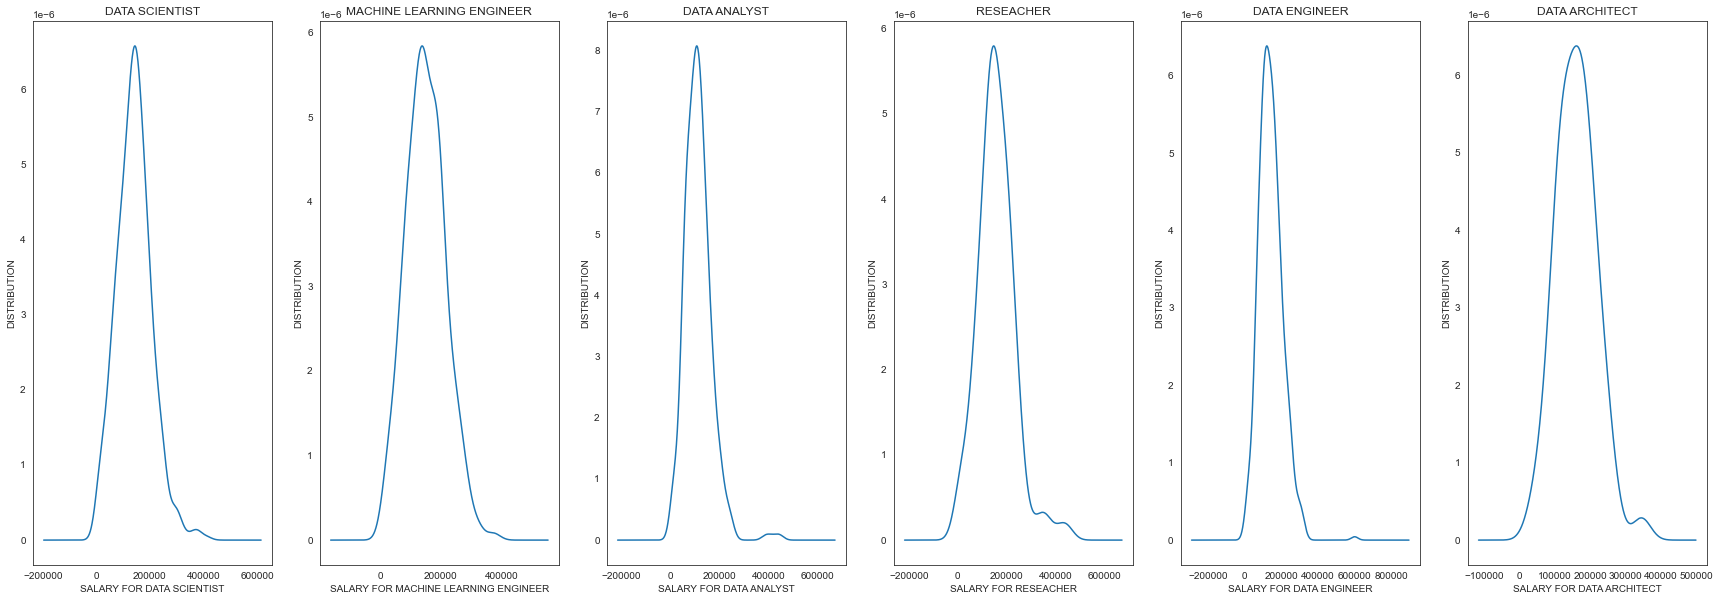

In [91]:

jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(30,10))
for job, i in zip(jobs, range(0, len(jobs))):
    salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'].plot(kind='density', ax=axs[i])
    axs[i].set_xlabel(f"SALARY FOR {job}", fontsize=10)
    axs[i].set_ylabel("DISTRIBUTION", fontsize=10)
    axs[i].set_title(f"{job}")
